In [1]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\car-mpg.csv")

In [3]:
data 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [4]:
data = data.drop(['car_name'],axis=1)
data['origin'] = data['origin'].replace({1:'america',2:'europe',3:'asia'})
data= pd.get_dummies(data,columns=['origin'],dtype=int)
data = data.replace('?',np.nan)

In [5]:
data = data.apply(pd.to_numeric,errors ='ignore')
numeric_cols= data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8704\375106951.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric,errors ='ignore')


In [6]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [7]:
x = data.drop(['mpg'],axis=1)
y = data[['mpg']]

In [8]:
x_s = preprocessing.scale(x)
x_s= pd.DataFrame(x_s, columns=x.columns)

y_s = preprocessing.scale(y)
y_s= pd.DataFrame(y_s, columns=y.columns)

In [9]:
x_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [10]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
intercept= regression_model.intercept_[0]
print('The intercept ia {}'.format(intercept))

The coefficient for cyl is 1.1321329016929331
The coefficient for disp is 0.021870916664800802
The coefficient for hp is -0.03697435039629115
The coefficient for wt is -0.006161226821177604
The coefficient for acc is 0.18528379196930378
The coefficient for yr is 0.7359710519093154
The coefficient for car_type is 5.222818504062049
The coefficient for origin_america is -1.5337484062982092
The coefficient for origin_asia is 1.1429070547072957
The coefficient for origin_europe is 0.39084135159091893
The intercept ia -25.804524189791913


In [13]:
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(x_train,y_train)

print('Ridge model coef:{}'.format(ridge_model.coef_))

Ridge model coef:[[ 1.0745122   0.02197319 -0.03635311 -0.00617876  0.18529325  0.73685277
   5.03900692 -1.53771689  1.13791133  0.39980556]]


In [14]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
print('Lasso model coef:{}'.format(lasso_model.coef_))

Lasso model coef:[ 0.          0.02297791 -0.02592527 -0.00641316  0.14984857  0.74506564
  2.04547367 -1.83928628  0.0771301  -0.        ]


In [15]:
#finding r2 and adjustedr2 for regression_model
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))

0.8373422857977738
0.8474768646673944


In [16]:
#r2 & adjusted r2 for L2(Ridge)
print(ridge_model.score(x_train,y_train))
print(ridge_model.score(x_test,y_test))

0.8373217642150054
0.8473212982285181


In [17]:
# r2 & adjusted r2 for for L1(LLasso)
print(lasso_model.score(x_train,y_train))
print(lasso_model.score(x_test,y_test))

0.8293310961823918
0.8431064583301076


In [18]:
data_train_test= pd.concat([x_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
64,8,318.0,150.0,4135,13.5,72,0,1,0,0,15.0
55,4,97.0,60.0,1834,19.0,71,1,0,0,1,27.0
317,4,97.0,78.0,2188,15.8,80,1,0,0,1,34.3
102,4,97.0,46.0,1950,21.0,73,1,0,0,1,26.0
358,4,120.0,74.0,2635,18.3,81,1,0,1,0,31.6


In [19]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept        -19.353393
cyl                1.132133
disp               0.021871
hp                -0.036974
wt                -0.006161
acc                0.185284
yr                 0.735971
car_type           5.222819
origin_america    -7.984879
origin_europe     -6.060290
origin_asia       -5.308224
dtype: float64

In [20]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          7.60e-116
Time:                        14:39:56   Log-Likelihood:                -814.21
No. Observations:                 318   AIC:                             1648.
Df Residuals:                     308   BIC:                             1686.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.3534      3.867     -5.

In [21]:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)
import math
rmse = math.sqrt(mse)
print('Rooot mean squared error:{}'.format(rmse))

Rooot mean squared error:3.1110637722452603


<Axes: xlabel='hp', ylabel='mpg'>

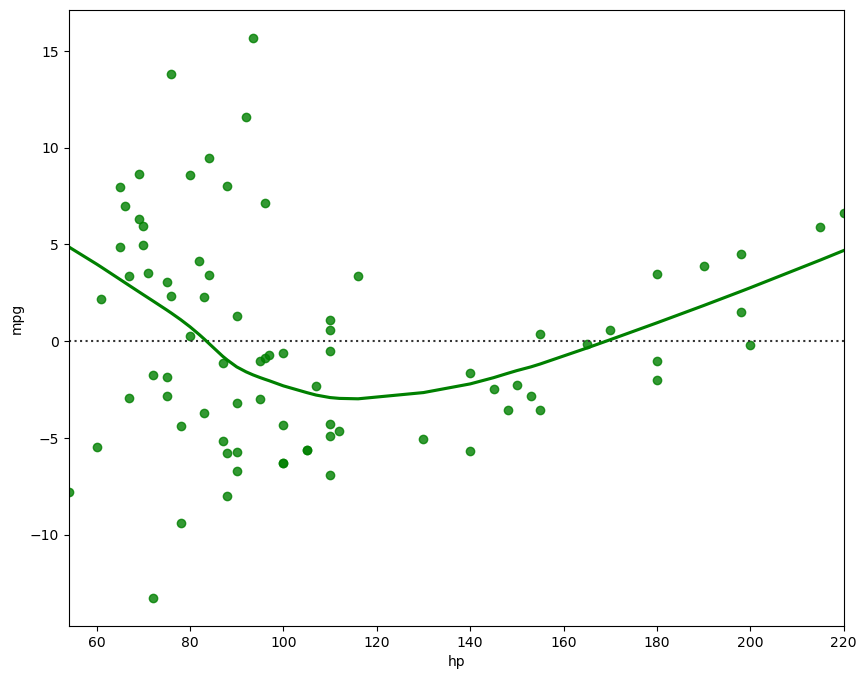

In [22]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test['hp'],y=y_test['mpg'],color='green',lowess=True)

<Axes: xlabel='acc', ylabel='mpg'>

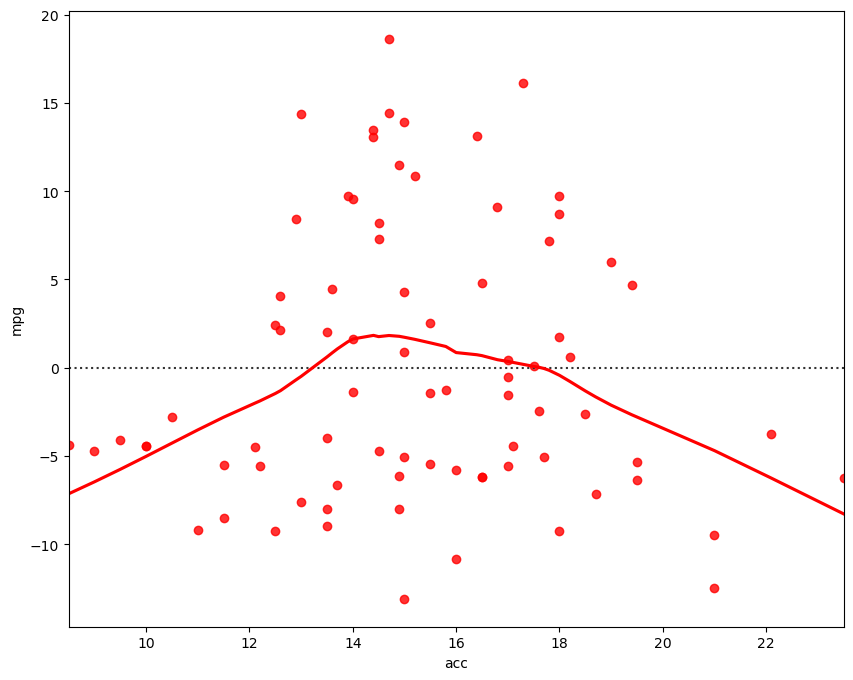

In [23]:
fig= plt.figure(figsize=(10,8))
sns.residplot(x=x_test['acc'],y=y_test['mpg'],color='red',lowess=True)

In [24]:
y_pred = regression_model.predict(x_test)

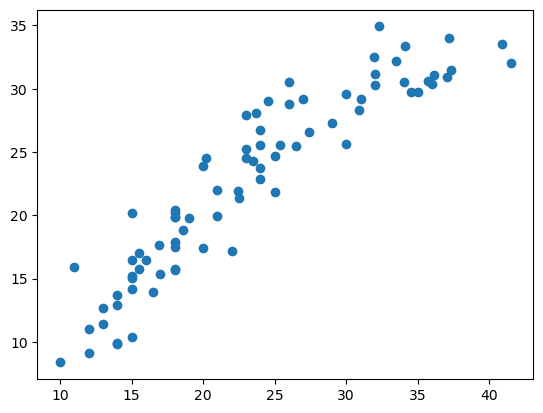

In [25]:
plt.scatter(y_test['mpg'],y_pred)